In [2]:
import openml
from openml.tasks import list_tasks, TaskType
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from src import GibbsForest
import logging


# Load the OpenML dataset
"""regression_tasks = list_tasks(task_type = TaskType.SUPERVISED_REGRESSION)
small_tasks_ids = []
for task_id, task_value in regression_tasks.items():
    We want datasets with instances between 5000 and 10000, no missing values, and no symbolic features
    if ('NumberOfInstances' in task_value.keys() and task_value['NumberOfInstances'] < 10000 and task_value['NumberOfInstances'] > 5000 and
    'NumberOfMissingValues' in task_value.keys() and task_value['NumberOfMissingValues'] == 0 and 
    'NumberOfSymbolicFeatures' in task_value.keys() and task_value['NumberOfSymbolicFeatures'] == 0):
        small_tasks_ids.append(task_id)"""
        

benchmark_suite = openml.study.get_suite(297)

In [2]:
logging.getLogger("openml.extensions.sklearn.extension").setLevel(logging.ERROR)
if not hasattr(GibbsForest, '__version__'):
    GibbsForest.__version__ = "0.0.1"  # Use an appropriate version number
    
"""for task in benchmark_suite.tasks:
    task = openml.tasks.get_task(task)
    dataset = task.get_dataset()
    name = dataset.name
    obs = dataset.qualities['NumberOfInstances']
    features = dataset.qualities['NumberOfFeatures'] 
    print(f"Dataset {name} with {obs} observations and {features} features")"""

'for task in benchmark_suite.tasks:\n    task = openml.tasks.get_task(task)\n    dataset = task.get_dataset()\n    name = dataset.name\n    obs = dataset.qualities[\'NumberOfInstances\']\n    features = dataset.qualities[\'NumberOfFeatures\'] \n    print(f"Dataset {name} with {obs} observations and {features} features")'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from src import Losses

benchmark_suite = openml.study.get_suite(297)

#task_id = small_tasks_ids[0]
#task_id = benchmark_suite.tasks[4]
task = openml.tasks.get_task(2289)
print(task)
X, y = task.get_X_and_y()
print(X)
print(f"Y mean: {y.mean():.4f}")

gibbs_params = {"leaf_eta": 0.1,
            "feature_subsample_rf": 0.7,
            "max_leaves": 30,
            "min_samples": 2,
            "n_trees": 80, 
            'row_subsample_rf': 0.9, 
            'warmup_depth': 2, 
            'loss_fn': Losses.LeastSquaresLoss(), 
            'reg_lambda': 0,
            'reg_gamma': 1, 
            'tree_eta': 0}

dyna = GibbsForest(**gibbs_params)

xgb_params = {
    'eta': 0.1, 
    'subsample': 0.99, 
    'max_depth': 5, 
    'reg_lambda': 0.1, 
    'gamma': 1
}

xgb = XGBRegressor(**xgb_params)

"""rf_params = {
            "max_depth": 5,
            "max_features": 0.50,
            "min_samples_leaf": 3,
            "n_estimators": 68}
dyna = RandomForestRegressor(**rf_params)"""

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("-- Fitting GIBBS --")
dyna.fit(X_train, y_train)
train_error = mean_absolute_error(y_train, dyna.predict(X_train))
test_error = mean_absolute_error(y_test, dyna.predict(X_test))
print(f"Train error: {train_error:.4f}")
print(f"Test error: {test_error:.4f}")

print("-- Fitting XGBoost --")
xgb.fit(X_train, y_train)
train_error = mean_absolute_error(y_train, xgb.predict(X_train))
test_error = mean_absolute_error(y_test, xgb.predict(X_test))
print(f"Train error: {train_error:.4f}")
print(f"Test error: {test_error:.4f}")

OpenML Regression Task
Task Type Description: https://www.openml.org/tt/TaskType.SUPERVISED_REGRESSION
Task ID..............: 361076
Task URL.............: https://www.openml.org/t/361076
Estimation Procedure.: crossvalidation
Evaluation Measure...: root_mean_squared_error
Target Feature.......: quality
Y mean: 5.8184
-- Fitting GIBBS --


TypeError: less_equal() takes from 2 to 3 positional arguments but 1 were given

In [ ]:
import numpy as np
#task_id = small_tasks_ids[0]
task = openml.tasks.get_task(2289)
X, y = task.get_X_and_y()
dataset = task.get_dataset()
name = dataset.name
obs = dataset.qualities['NumberOfInstances']
features = dataset.qualities['NumberOfFeatures'] 
print(f"===== DATASET {name} with {obs} observations and {features} features ====")


0
===== DATASET delta_elevators with 9517.0 observations and 7.0 features ====


In [ ]:
import pandas as pd
def load_concrete_strength():
    """
    Loads the Concrete Compressive Strength dataset from UCI.
    Note: This file is in Excel format, so you may need to have an Excel engine installed.
    """
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls"
    df = pd.read_excel(url)
    # The target is the last column (commonly 'Concrete compressive strength')
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    return X, y

X, y = load_concrete_strength()


In [ ]:
X

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


Mean correlation among tree predictions: 0.0101
Mean correlation among tree residuals: 0.1184
Average individual tree MSE: 0.1649
Ensemble MSE: 0.0191
Average individual tree MAE: 0.3021
Ensemble MAE: 0.1084
Average variance of tree predictions across samples: 0.1459
Ambiguity (Average tree MSE - Ensemble MSE): 0.1459
Not all trees have a 'feature_importances_' attribute.


/Users/asherlabovich/miniconda3/envs/data1030/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/asherlabovich/miniconda3/envs/data1030/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/asherlabovich/miniconda3/envs/data1030/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


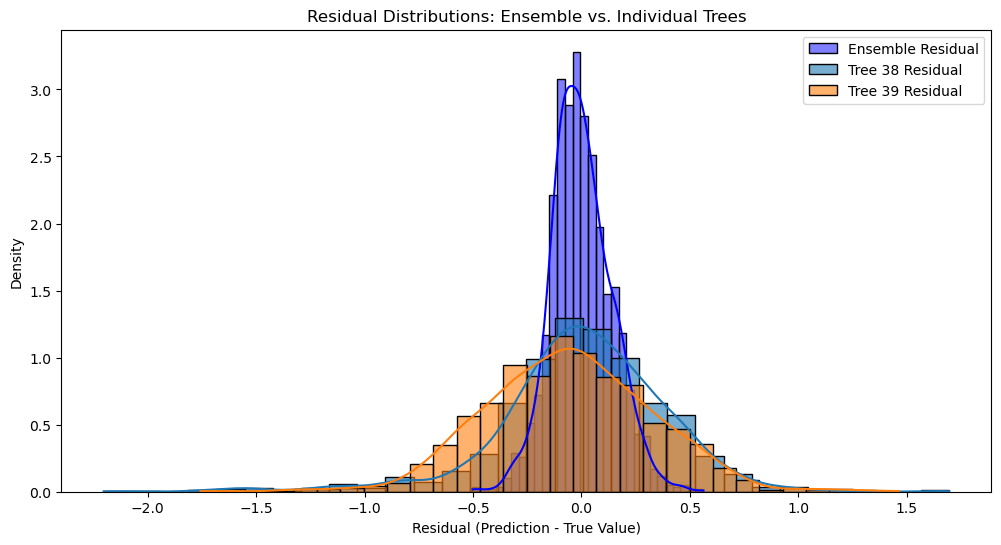

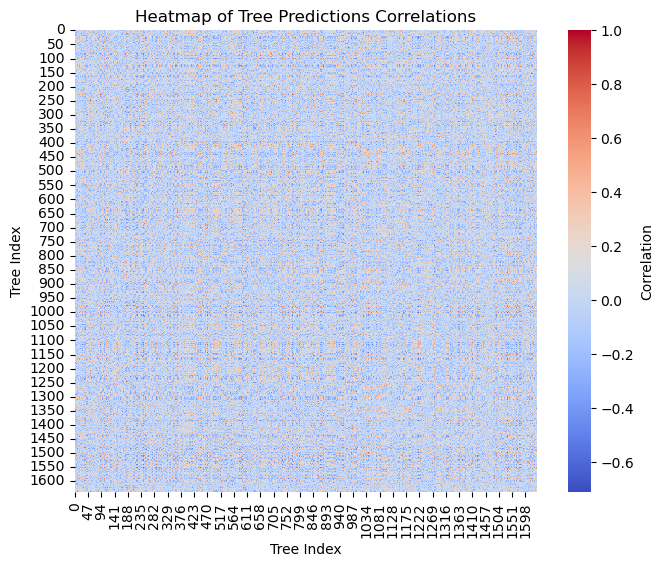

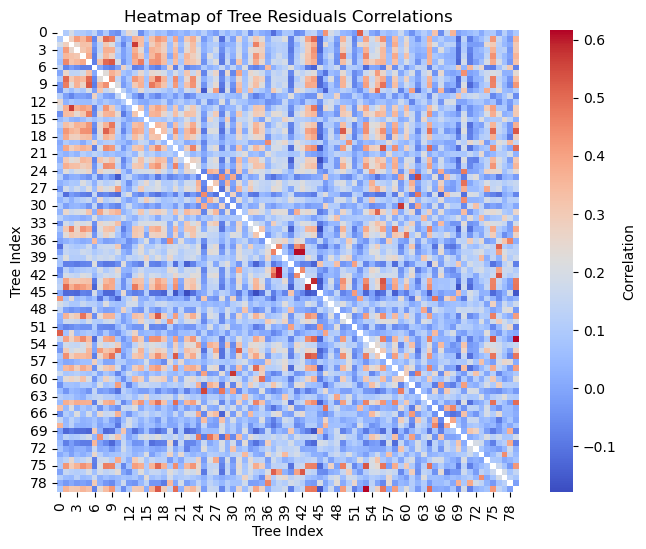

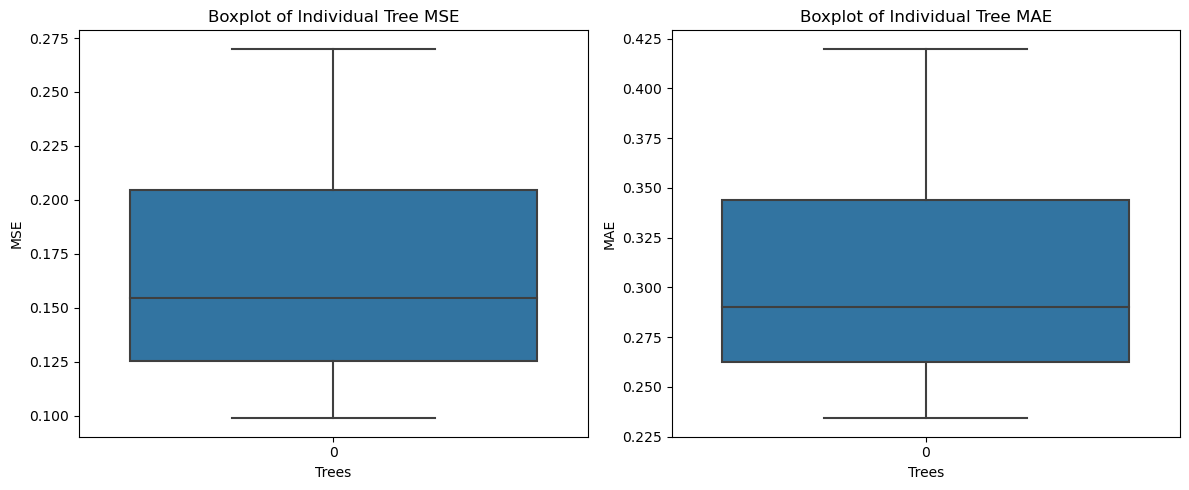

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error

# -------------------------------
# Assumptions:
#   - dyna: your trained random forest model (e.g., RandomForestRegressor)
#           with an attribute `estimators_` (list of individual tree models)
#   - X_test: test features (numpynp.array or similar)
#   - y_test: true test targets (numpynp.array)
#
# Replace the following dummy definitions with your actual data/model.
# -------------------------------
# Example (comment these out if you already have these defined):
# from sklearn.datasets import make_regression
# from sklearn.ensemble import RandomForestRegressor
#
# X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# dyna = RandomForestRegressor(n_estimators=50, random_state=42)
# dyna.fit(X_train, y_train)

# -------------------------------
# 1. Compute Predictions for Each Tree
# -------------------------------
trees = dyna._trees
n_trees = len(trees)
# Each tree produces predictions on the test set; shape: (n_trees, n_samples)
predictions = np.array([tree.predict(X_test) for tree in trees])

# Ensemble prediction is the average over trees:
ensemble_pred = np.mean(predictions, axis=0)

# -------------------------------
# 2. Compute Residuals (Errors)
# -------------------------------
# Residuals for each tree and for the ensemble:
residuals = predictions - y_test  # shape: (n_trees, n_samples)
ensemble_residual = ensemble_pred - y_test

# -------------------------------
# 3. Correlation Among Tree Predictions
# -------------------------------
# Compute the correlation matrix among the trees’ predictions.
correlation_matrix = np.corrcoef(predictions, rowvar=False)
# Compute the mean correlation (using only the off-diagonal values)
upper_tri_indices = np.triu_indices(n_trees, k=1)
mean_correlation = np.mean(correlation_matrix[upper_tri_indices])
print("Mean correlation among tree predictions: {:.4f}".format(mean_correlation))

# -------------------------------
# 4. Correlation Among Tree Residuals
# -------------------------------
resid_corr_matrix = np.corrcoef(residuals)
mean_resid_corr = np.mean(resid_corr_matrix[upper_tri_indices])
print("Mean correlation among tree residuals: {:.4f}".format(mean_resid_corr))

# -------------------------------
# 5. Compute MSE and MAE for Each Tree and the Ensemble
# -------------------------------
tree_mse = np.array([mean_squared_error(y_test, predictions[i]) for i in range(n_trees)])
tree_mae = np.array([mean_absolute_error(y_test, predictions[i]) for i in range(n_trees)])
ensemble_mse = mean_squared_error(y_test, ensemble_pred)
ensemble_mae = mean_absolute_error(y_test, ensemble_pred)

print("Average individual tree MSE: {:.4f}".format(np.mean(tree_mse)))
print("Ensemble MSE: {:.4f}".format(ensemble_mse))
print("Average individual tree MAE: {:.4f}".format(np.mean(tree_mae)))
print("Ensemble MAE: {:.4f}".format(ensemble_mae))

# -------------------------------
# 6. Compute Prediction Variance Across Trees (Per Sample)
# -------------------------------
# For each test sample, compute variance among the tree predictions
variance_per_sample = np.var(predictions, axis=0)
avg_prediction_variance = np.mean(variance_per_sample)
print("Average variance of tree predictions across samples: {:.4f}".format(avg_prediction_variance))

# -------------------------------
# 7. Ambiguity Decomposition (Regression)
# -------------------------------
# One way to look at ensemble benefits is via the ambiguity decomposition:
#   Ensemble MSE = Average tree MSE - Ambiguity
ambiguity = np.mean(tree_mse) - ensemble_mse
print("Ambiguity (Average tree MSE - Ensemble MSE): {:.4f}".format(ambiguity))

# -------------------------------
# 8. Feature Importances (If Available)
# -------------------------------
# If your individual trees have a `feature_importances_` attribute,
# compute the average importance for each feature.
try:
    feature_importances = np.array([tree.feature_importances_ for tree in trees])
    avg_feature_importance = np.mean(feature_importances, axis=0)
    
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(avg_feature_importance)), avg_feature_importance, color='skyblue')
    plt.xlabel("Feature Index")
    plt.ylabel("Average Feature Importance")
    plt.title("Average Feature Importances Across Trees")
    plt.show()
except AttributeError:
    print("Not all trees have a 'feature_importances_' attribute.")

# -------------------------------
# 9. Plot Distribution of Residuals
# -------------------------------
plt.figure(figsize=(12, 6))
# Plot ensemble residual distribution
sns.histplot(ensemble_residual, color="blue", label="Ensemble Residual", kde=True, stat="density", bins=30)

# Plot residual distributions for a few individual trees (first 3 trees)
for i in [38, 39]:
    sns.histplot(residuals[i], kde=True, stat="density", bins=30, label=f"Tree {i} Residual", alpha=0.6)
    
plt.xlabel("Residual (Prediction - True Value)")
plt.ylabel("Density")
plt.title("Residual Distributions: Ensemble vs. Individual Trees")
plt.legend()
plt.show()

# -------------------------------
# 10. Correlation Heatmap for Tree Predictions
# -------------------------------
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap="coolwarm", square=True, cbar_kws={'label': 'Correlation'})
plt.title("Heatmap of Tree Predictions Correlations")
plt.xlabel("Tree Index")
plt.ylabel("Tree Index")
plt.show()

# -------------------------------
# 11. Correlation Heatmap for Tree Residuals
# -------------------------------
plt.figure(figsize=(8, 6))
sns.heatmap(resid_corr_matrix, cmap="coolwarm", square=True, cbar_kws={'label': 'Correlation'}, mask = np.eye(*resid_corr_matrix.shape))
plt.title("Heatmap of Tree Residuals Correlations")
plt.xlabel("Tree Index")
plt.ylabel("Tree Index")
plt.show()

# -------------------------------
# 12. Boxplots for Individual Tree MSE and MAE
# -------------------------------
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=tree_mse)
plt.title("Boxplot of Individual Tree MSE")
plt.xlabel("Trees")
plt.ylabel("MSE")

plt.subplot(1, 2, 2)
sns.boxplot(data=tree_mae)
plt.title("Boxplot of Individual Tree MAE")
plt.xlabel("Trees")
plt.ylabel("MAE")
plt.tight_layout()
plt.show()


In [ ]:
split_counts = [tree.num_splits for tree in dyna._trees]
plt.hist(split_counts, bins=range(0, max(split_counts)+2, 2))
plt.title("Distribution of Splits per Tree")
plt.xlabel("Number of Splits")
plt.ylabel("Count of Trees")
plt.show()


In [ ]:
trees = dyna._trees
predictions = np.array([tree.predict(X_train) for tree in trees])
tree_mse = np.array([mean_squared_error(y_train, predictions[i]) for i in range(len(trees))])
best_tree_idxs = np.argsort(tree_mse)
errors = []
for num_trees in range(2, 79):    
    tree_list = [trees[i] for i in best_tree_idxs][:num_trees]
    predictions_test = np.array([tree.predict(X_test) for tree in tree_list])
    ensemble_pred = np.mean(predictions_test, axis=0)
    ensemble_mse = mean_squared_error(y_test, ensemble_pred)
    ensemble_mae = mean_absolute_error(y_test, ensemble_pred)
    errors.append(ensemble_mae)

# Plot the error as a function of the number of trees
plt.figure(figsize=(8, 5))
plt.plot(range(2, 79), errors, marker='o', color='blue')
plt.xlabel("Number of Trees")
plt.ylabel("Ensemble MAE")
plt.title("Ensemble MAE vs. Number of Trees")
plt.grid(True)

In [ ]:
xgb = XGBRegressor()
print(xgb)